   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
   age     sex    dataset       

C:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.917

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        35
           1       0.88      0.92      0.90        25

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60


Confusion Matrix:
 [[32  3]
 [ 2 23]]
Accuracy: 0.700

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74        35
           1       0.63      0.68      0.65        25

    accuracy                           0.70        60
   macro avg       0.69      0.70      0.69        60
weighted avg       0.70      0.70      0.70        60


Confusion Matrix:
[[25 10]
 [ 8 17]]


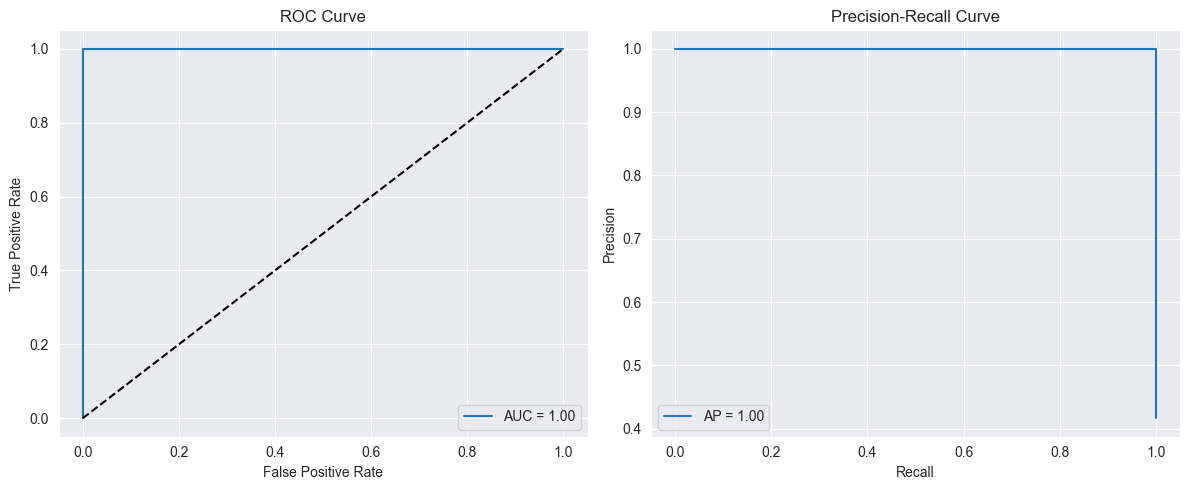

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_auc_score, \
    average_precision_score, roc_curve, precision_recall_curve

df = pd.read_csv(r'C:\Users\aryan\machinel\Assignment1\Data\heart_disease_uci(1).csv')
print(df.head())
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\aryan\machinel\Assignment1\Data\heart_disease_uci(1).csv')

print(df.head())

print("\nColumn names and types:")
print(df.dtypes)

df = df.drop(columns=['dataset'])

df = df.dropna()

df['target'] = (df['num'] > 0).astype(int)
df = df.drop(columns=['num'])

df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

print("Data shape after encoding:", df.shape)
print(df.head())

# Clean column names: replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)
print(df.columns.tolist())

# Features (everything except target)
X_reg = df.drop(columns=['target'])

# Target variable
y_reg = df['target']

from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

from sklearn.linear_model import ElasticNet

# Initialize and fit
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")
# Classification: Predict 'target'
X_cls = df.drop(columns=['target'])  # Features
y_cls = df['target']

from sklearn.model_selection import train_test_split

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_cls, y_train_cls)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_cls = clf.predict(X_test_cls)

print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls):.3f}")
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
# Define classification features and target
X_class = df.drop(columns=['target'])
y_class = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# k-NN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Recreate classification data if needed
X_class = df.drop(columns=['chol'])
y_class = df['target']

# Train/test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_log, y_train_log)

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = logreg.predict_proba(X_test_log)[:, 1]  # probability of class 1

# ROC curve
fpr, tpr, _ = roc_curve(y_test_log, y_probs)
roc_auc = auc(fpr, tpr)

# PR curve
precision, recall, _ = precision_recall_curve(y_test_log, y_probs)
avg_prec = average_precision_score(y_test_log, y_probs)

# Plot both
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"AP = {avg_prec:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()



## Model Evaluation Summary

### Regression (ElasticNet)
- **Mean Squared Error (MSE):** 0.146
- **R² Score:** 0.399

ElasticNet did a moderate job at predicting the `num` variable. An R² of 0.399 indicates it explains about 40% of the variance. Regularization likely helped prevent overfitting.

---

### Classification (Logistic Regression vs k-NN)

| Metric       | Logistic Regression | k-NN (k=5)     |
|--------------|---------------------|----------------|
| Accuracy     | 91.7%               | 70.0%          |
| Precision (0)| 0.94                | 0.76           |
| Precision (1)| 0.88                | 0.63           |
| Recall (0)   | 0.91                | 0.71           |
| Recall (1)   | 0.92                | 0.68           |

**Logistic Regression** outperformed k-NN across all metrics, showing higher precision and recall. It may generalize better on this dataset, especially with regularization.

---

###  Interpretation

- Logistic Regression is better suited for this classification task due to its performance and interpretability.
- k-NN might be sensitive to data scaling and feature dimensions.

## AUROC and AUPRC Curves

To evaluate the discriminative power of the best model (Logistic Regression), we plotted:

- **ROC Curve** (Receiver Operating Characteristic)
- **Precision-Recall Curve**

These curves help assess how well the model ranks positive vs. negative instances.
